# Stock market price for Tesla

1. pick one use case: Stock market price for TESLA.
2. regression algorithem would work best fot the chosen usecase.
3. Documenten findings: For stock price prediction on the closing price regression algorithem is sueted. Howevver if the golle had ben to predicts whather the stock price would increase or decrease the nex day classification had ben best sueted. But in this case, the goall ar to predict the closing price for one specific date. Therfor an regression algorithem is best sueted in this case.
sorce: https://ieeexplore.ieee.org/stamp/stamp.jsptp=&arnumber=9154061&isnumber=9153968

4. code below


In [28]:
# 1. pick one use case: Stock market price for TESLA.
# 2. regression algorithem would work best fot the chosen usecase. bay resherching the DecissionTreregressor loks prommisning for this task
# 3.
#For stock price prediction on the closing price regression algorithem is sueted. If the golle is to predicts whather the closing price of  stock wil increase or decrease the nex day classification is best sueted.
# In this case the the goall is to predict teh closing price for one specific date so therfor the regression algorithem is best sueted in this case.
# sorce: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9154061&isnumber=9153968
# 4. code below

In [29]:
#%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-whitegrid')
from sklearn import metrics

#from sklearn import metrics
#from sklearn import preprocessing
#from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import RepeatedKFold
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import MinMaxScaler

In [30]:
#read the file
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"
#Find the raw url from the github repo
df = pd.read_csv(url)

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [32]:
df.shape

(2845, 7)

In [33]:
#Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

In [34]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=  df['Date'].map(dt.datetime.toordinal)

In [35]:
# Keep only the 'Close' Value' ,'Date' and the index
df = df[['Date','Close']]

Text(0, 0.5, 'close price USD ($)')

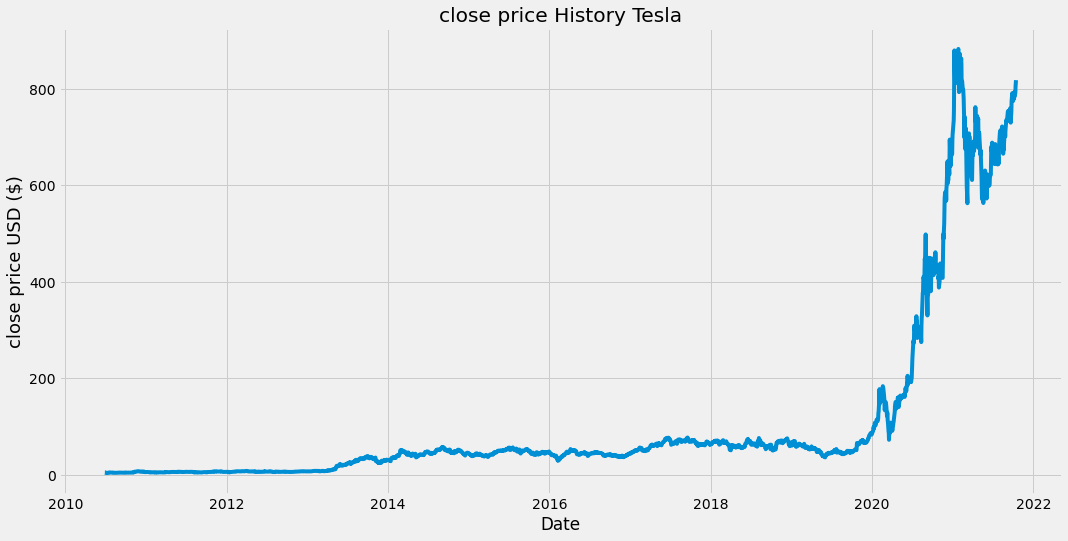

In [36]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('close price History Tesla')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('close price USD ($)', fontsize=18)


In [37]:
# Re-inspect data
df.head()

,Date,Close
Date,,
2010-06-29,733952,4.778
2010-06-30,733953,4.766
2010-07-01,733954,4.392
2010-07-02,733955,3.840
2010-07-06,733959,3.222


In [38]:
#Create a new dataframe whit only the 'Close' column
#data = df.filter(['Close'])
#convert the dataset to a numpay array
#dataset = data.values

In [39]:
#dataset

In [40]:
#Get the number of rows to train the model on
#training_data_len = math.ceil( len(dataset) * .8)

#training_data_len

In [41]:
#preppering to splitt the data sett create variable x and y who storr the vallue in 'Closse' and 'Date'
#X = pd.DataFrame(df['Close']) #Close
#y = pd.DataFrame(df['Date']) #Date

#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test arrat
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,)

In [42]:
# create variable to predict 'x' days into the future
future_days = 25
#Create a new colum (target) shiftd 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Date,Close,Prediction
Date,,,
2021-10-11,738074,791.940002,NaN
2021-10-12,738075,805.719971,NaN
2021-10-13,738076,811.080017,NaN
2021-10-14,738077,818.320007,NaN


In [43]:
#Create the future daa seet (x) and convert it to a numpay array and reomve thel last 'X' rows/days
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)

[[7.33952000e+05 4.77800000e+00]
 [7.33953000e+05 4.76600000e+00]
 [7.33954000e+05 4.39200000e+00]
 ...
 [7.38040000e+05 7.52919983e+02]
 [7.38041000e+05 7.53869995e+02]
 [7.38042000e+05 7.54859985e+02]]


C:\Users\Kim\AppData\Local\Temp/ipykernel_15040/3356939589.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [44]:
#Create taget data set (y) and convert it  to a numpay arrey and get all of the taget values exept the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  4.252      4.09       3.918    ... 805.719971 811.080017 818.320007]


In [45]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50)

Train the algorithm for the Close price prediction

In [46]:
#algorithem training /
#Create the models
#Create the decissin tree regresssor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [47]:
#Get the last 'x'rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\Kim\AppData\Local\Temp/ipykernel_15040/878759070.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[7.38007000e+05, 7.14630005e+02],
       [7.38008000e+05, 6.99099976e+02],
       [7.38011000e+05, 7.13760010e+02],
       [7.38012000e+05, 7.09989990e+02],
       [7.38013000e+05, 7.07820007e+02],
       [7.38014000e+05, 7.22250000e+02],
       [7.38015000e+05, 7.17169983e+02],
       [7.38018000e+05, 6.86169983e+02],
       [7.38019000e+05, 6.65710022e+02],
       [7.38020000e+05, 6.88989990e+02],
       [7.38021000e+05, 6.73469971e+02],
       [7.38022000e+05, 6.80260010e+02],
       [7.38025000e+05, 7.06299988e+02],
       [7.38026000e+05, 7.08489990e+02],
       [7.38027000e+05, 7.11200012e+02],
       [7.38028000e+05, 7.01159973e+02],
       [7.38029000e+05, 7.11919983e+02],
       [7.38032000e+05, 7.30909973e+02],
       [7.38033000e+05, 7.35719971e+02],
       [7.38034000e+05, 7.34090027e+02],
       [7.38035000e+05, 7.32390015e+02],
       [7.38036000e+05, 7.33570007e+02],
       [7.38040000e+05, 7.52919983e+02],
       [7.38041000e+05, 7.53869995e+02],
       [7.380420

In [48]:
#show the model tre prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

[744.48999  753.869995 744.48999  755.830017 753.640015 759.48999
 744.48999  753.640015 751.940002 753.640015 751.940002 753.640015
 775.47998  775.47998  775.47998  775.47998  775.47998  785.48999
 785.48999  785.48999  785.48999  791.940002 805.719971 805.719971
 805.719971]



In [52]:
from sklearn import metrics
print( "MSE = "+str(metrics.mean_squared_error(y_train, x_future))) #Calculate MSE

ValueError: Found input variables with inconsistent numbers of samples: [1410, 25]

In [ ]:
#Visualiz the data
predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()